# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import math

df = pd.read_csv('data/human_body_temperature.csv')

### 1) Is this sample normal? See below. 

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns 


# Set default Seaborn style
sns.set()

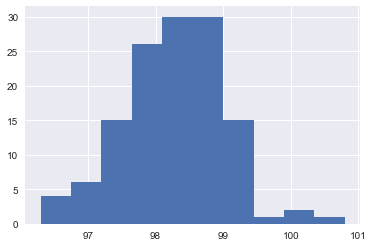

In [4]:
plt.hist(df.temperature)

# Show histogram
plt.show()

The histogram does look normaly distributed. 

In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [6]:
from scipy import stats
k2, p = stats.normaltest(df.temperature)
alpha = 1e-3
print("p = {:g}".format(p))

p = 0.258748


### Given that p is much larger than alpha, we see that this data comes from the normal distribution. 

## Question 2: Is the sample size large? Are the observations independent?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


#### There are only 130 samples in this data set. That is very small in comparision to the world population. This is only a sample of the  dataset presented Journal of the American Medical Association_, 268, 1578-1580, so I do believe them to be independent observations. 

## Question 3: Is the true population mean really 98.6 degrees F?

In [8]:
# The mean of this sample is ~98.3 degrees F.  and a std of ~ 0.73
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### I would use a one sample test as we only have one variable and we are not looking at a change in this variable. 

Since we have more than 30 samples and have a normal distribution we can use the z-stat. 

In [9]:
from statsmodels.stats.weightstats import ztest

In [10]:
# using the ztest we clearly see that 98.6 is not the true mean of human body temp
tstat, pvalue = ztest(df.temperature, value = 98.6)

In [11]:
pvalue

4.9021570141012155e-08

In [12]:
tstat

-5.4548232923645195

Next I am attempting to manually do this. 

In [13]:
# one sample Z-test 
# Null hypotheses is that the true mean = 98.6 
# n = 130  , sample mean = 98.249231 , std = 0.73 ,  True mean = 98.6 , alpha = 0.05 

In [14]:
SE_mean = 0.733183/ math.sqrt(130)
SE_mean

0.06430440297695857

In [15]:
# z = (MEAN_sample - MEAN_ASSUMED) / SE_mean
z = (98.249231 - 98.6) / SE_mean
z

-5.454820879461186

In [16]:
# using a t test 
stats.ttest_1samp(df.temperature, 98.6) 

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

## Based on both test it seems that 98.6 is not the true mean.

## Question  4

In [17]:
# The correct one to use is the t-statistic as we have a small sample less than 30. 

In [18]:
sample = df.sample(10)

In [19]:
sample.mean()

temperature    98.32
heart_rate     74.20
dtype: float64

In [20]:
stats.ttest_1samp(sample.temperature, 98.6) 

Ttest_1sampResult(statistic=-1.6550318531020409, pvalue=0.13230296093399146)

In [21]:
tstat, pvalue = ztest(sample.temperature, value = 98.6)

In [22]:
pvalue

0.097918036775575271

In [23]:
tstat

-1.6550318531020409

In [24]:
# From two tails T distribution table with 9 df and 0.05 alpha. [-2.262 , 2.262]
# Since our stat is in this range we would not reject the null Hypotheses. So only using this sample of 10, 
# We say that the T-test shows the true mean is likely 98.6 degrees. 

# I am confused here as I don't see a difference between the two test but I am supposed to be.  ??????????????????

# Q 5 

In [25]:
#  For 95% confidence we use a Z value of 1.96 

In [26]:
margin_of_error = (1.96)*(0.733183/ math.sqrt(130))
margin_of_error

0.1260366298348388

In [27]:
98.249231-margin_of_error


98.12319437016515

In [28]:
98.249231 + margin_of_error

98.37526762983484

#### So our margin of error is +/- 0.126
#### Our 95% confidence interval for the mean is [98.1,98.4]

### Q 6

In [29]:
from scipy.stats import ttest_ind

In [30]:
males = df[df.gender == "M"]
females = df[df.gender == "F"]

In [31]:
males.temperature.mean()

98.1046153846154

In [32]:
females.temperature.mean()

98.39384615384613

In [33]:
# I am going to use a two sample t-Test for equal means. This will test if the males and females statisically seem to be 
# from the same distribution. 
# Our null hypothysis is that they two means are the same and 
# there is not a significate difference in mean temp for mean and women.

In [34]:
ttest_ind(males.temperature, females.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

In [35]:
# As our absolute value of our T- statistic  is greater than 1.96 we reject the null hypothesis. 
# Conclude that with 95% confidence the means of men and women are different.  

## Conlcusion: The normal body temperature is actually statistically lower than 98.6. This is probably so to make sure people with slightly higher normal temperatures are not treated as being sick when they are not. We can further conclude that being slightly over 98.6 is significate. 